In [1]:
#Importing the necessary libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [2]:
# importing the pre-processed dataset
data = pd.read_csv('emission50000t_25000v.csv',delimiter=',')

In [3]:
data.head(10)

,Unnamed: 0,timestep_time,vehicle_fuel,vehicle_id,vehicle_speed,vehicle_waiting,vehicle_x,vehicle_y
0,0,0.0,1.13,0.0,0.00,0.0,13229.54,13858.50
1,1,1.0,1.37,0.0,1.71,0.0,13229.34,13856.80
2,2,1.0,1.13,1.0,0.00,0.0,8550.01,7263.51
3,3,2.0,2.15,0.0,4.24,0.0,13228.85,13852.59
4,4,2.0,1.31,1.0,1.51,0.0,8548.71,7264.28
5,5,2.0,1.13,2.0,0.00,0.0,8674.21,11046.05
6,6,3.0,2.33,0.0,6.26,0.0,13228.14,13846.37
7,7,3.0,1.87,1.0,3.70,0.0,8545.53,7266.16
8,8,3.0,1.59,2.0,2.25,0.0,8675.37,11047.98
9,9,3.0,1.13,3.0,0.00,0.0,9074.73,6440.73


In [4]:
# generating the X value of the dataset for Elbow method
X=data[["timestep_time","vehicle_x","vehicle_y"]].values


In [5]:
# confirming the total number of vehicles which is 25000 [0,...,24999]
max(data['vehicle_id'])

24999.0

Generating the Elbow method for 25 number of clusters.
Elbow method is heuristic used in determining the number of clusters in a dataset.

Done : 1
Done : 2
Done : 3
Done : 4
Done : 5
Done : 6
Done : 7
Done : 8
Done : 9
Done : 10
Done : 11
Done : 12
Done : 13
Done : 14
Done : 15
Done : 16
Done : 17
Done : 18
Done : 19
Done : 20
Done : 21
Done : 22
Done : 23
Done : 24


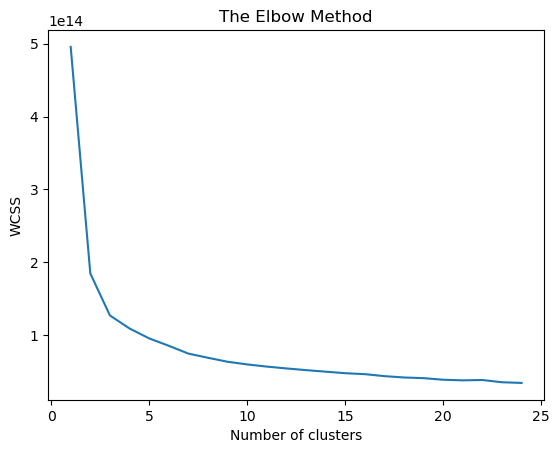

In [6]:

wcss = []
for i in range(1, 25):
    kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', max_iter=50, n_init=2, random_state=20,batch_size=500)
    y_kmeans = kmeans.fit_predict(X)
    print("Done : "+str(i))
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 25), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Generating the Elbow method for 50 number of clusters.

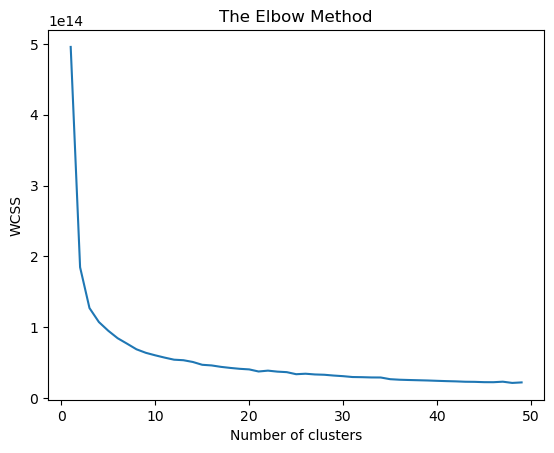

In [8]:
wcss = []
for i in range(1, 50):
    kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=20,batch_size=500)
    y_kmeans = kmeans.fit_predict(X)
    #print("Done : "+str(i))
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 50), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Performing the MiniBatch Kmeans Clustering for 100 iterations and on 25 number of cluster's data.

In [22]:
kmeans = MiniBatchKMeans(n_clusters=25, init='k-means++', max_iter=100, n_init=10, random_state=20,batch_size=10000,verbose=1)
y_kmeans = kmeans.fit_predict(X)
cent=kmeans.cluster_centers_


Init 1/10 with method: k-means++
Inertia for init 1/10: 137949341523.585632
Init 2/10 with method: k-means++
Inertia for init 2/10: 139301307806.528046
Init 3/10 with method: k-means++
Inertia for init 3/10: 139708109919.221252
Init 4/10 with method: k-means++
Inertia for init 4/10: 140526556223.191925
Init 5/10 with method: k-means++
Inertia for init 5/10: 139410708224.238983
Init 6/10 with method: k-means++
Inertia for init 6/10: 135152881889.025894
Init 7/10 with method: k-means++
Inertia for init 7/10: 135913590394.880020
Init 8/10 with method: k-means++
Inertia for init 8/10: 135277941512.085419
Init 9/10 with method: k-means++
Inertia for init 9/10: 137472152447.236694
Init 10/10 with method: k-means++
Inertia for init 10/10: 138156849717.408142
Minibatch iteration 1/79600: mean batch inertia: 4444402.537268, ewa inertia: 4444402.537268 
Minibatch iteration 2/79600: mean batch inertia: 4484729.036998, ewa inertia: 4444503.912806 
Minibatch iteration 3/79600: mean batch inertia: 4

In [23]:
# print the centroids of the top 25 clusters
cent

array([[ 1649.52409772, 10011.56646728, 11272.6633371 ],
       [16348.49839689,  8848.57747094,  8513.38386239],
       [23421.9675506 ,  8386.79860368,  7515.90471814],
       [13256.14205112, 13152.12634781, 14423.97790009],
       [ 8188.14773682, 11394.34931478,  9048.86514796],
       [21909.49366191, 11527.25933575, 12387.68184122],
       [ 5838.25414808,  8374.82674362,  6972.17656047],
       [12144.16183233,  8682.46492028,  8974.30842083],
       [10172.86316748, 10005.49813717, 11629.1059759 ],
       [ 7837.51309741, 12945.47780329, 14134.18452231],
       [ 3295.64382329, 11155.31218131,  8419.80012984],
       [23730.57835417,  9598.25481531, 11146.42036537],
       [14730.36960451,  9320.81684707, 11908.05271806],
       [20174.76154026,  8656.21524877,  9824.53950825],
       [ 5108.25126617, 10612.8827412 , 11616.43024025],
       [ 1910.04309712,  8259.79441821,  7669.2657087 ],
       [20723.17951266, 14082.94931616, 16086.91220668],
       [13866.10899253,  8231.7

In [24]:
# Saving the locations of the 25 clusters in the centroids_25 csv file
np.savetxt("centroids_25.csv",cent,delimiter=',')

Printing the Locations of the centroids in the 2D plan

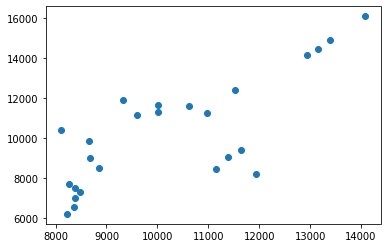

In [25]:
x=[]
y=[]
for i in cent:
    x.append(i[1])
    y.append(i[2])
plt.scatter(x,y)

location = pd.DataFrame(columns=['x-axis','y-axis'])

x_avg=round(np.average(x))
y_avg=round(np.average(y))
avg=np.array([x_avg,y_avg])
temp=np.array([0,0])

saving the data in the location dataframe.

In [27]:
location['x-axis']=x
location['y-axis']=y

In [28]:
location

,x-axis,y-axis
0,10011.566467,11272.663337
1,8848.577471,8513.383862
2,8386.798604,7515.904718
3,13152.126348,14423.977900
4,11394.349315,9048.865148
5,11527.259336,12387.681841
6,8374.826744,6972.176560
7,8682.464920,8974.308421
8,10005.498137,11629.105976
9,12945.477803,14134.184522


In [29]:
location.to_csv('location_25.csv')

Defining the function to print the path taken by a particular vehicle in the simulation.

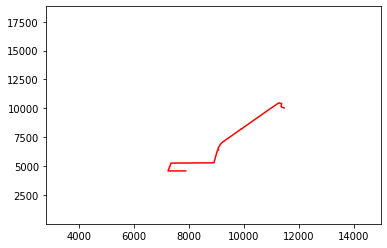

In [30]:
df_curr=data
def plot_for_individual_node(node):
    df_temp=df_curr.loc[df_curr['vehicle_id'] == node]
    X_temp=df_temp.vehicle_x.values
    Y_temp=df_temp.vehicle_y.values
    plt.plot(X_temp, Y_temp, 'r')
    plt.axis([min(df_curr.vehicle_x.values), max(df_curr.vehicle_x.values), min(df_curr.vehicle_y.values), max(df_curr.vehicle_y.values)])
    plt.show()
plot_for_individual_node(12000)

In [32]:
def df_individual_time(time):
    df_temp=df_curr.loc[df_curr['timestep_time'] == time][["vehicle_x","vehicle_y"]]
    #X_temp=df_temp.X.values
    #Y_temp=df_temp.Y.values
    #plt.plot(X_temp, Y_temp, 'ro')
    #plt.axis([min(df_curr.X.values), max(df_curr.X.values), min(df_curr.Y.values), max(df_curr.Y.values)])
    #plt.show()
    return df_temp#zip(X_temp,Y_temp)
df_individual_time(15000)

,vehicle_x,vehicle_y
4707952,4338.25,4889.23
4707953,14480.19,17025.87
4707954,14508.36,17078.14
4707955,14522.70,17104.72
4707956,12227.15,8295.41
...,...,...
4708258,8553.78,8692.95
4708259,11890.60,9640.72
4708260,6869.15,9635.79
4708261,10501.81,7391.85


Plotting the top 25 Cluster points(blue) and the average of the locations in X and y of the cluster in green

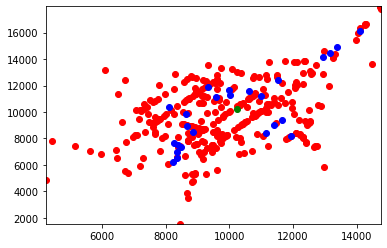

In [33]:
def plot_for_individual_time1(time):
    df_temp=df_curr.loc[df_curr['timestep_time'] == time]
    X_temp=df_temp.vehicle_x.values
    Y_temp=df_temp.vehicle_y.values
    plt.plot(X_temp, Y_temp, 'ro')
    plt.plot(x,y,'bo')
    plt.plot(x_avg,y_avg,'go')
    plt.axis([min(df_temp.vehicle_x.values), max(df_temp.vehicle_x.values), min(df_temp.vehicle_y.values), max(df_temp.vehicle_y.values)])
    plt.show()
plot_for_individual_time1(3000)

Defining the function to find the vehicle density from the data. It accepts the X,Y of the cluster, radius of the circle for euclidean distance and timestep at which the density is to be found.

In [60]:
def find_density(lat,lon,radius,time):
    #dist1=[]
    #dist2=[]
    count=0
    dist=0
    df_time=df_curr.loc[df_curr['timestep_time'] == time]
    #print("found data at time: "+str(time))
    X_temp=df_time.vehicle_x.values
    Y_temp=df_time.vehicle_y.values
    for i in range(0,len(X_temp)):
        dist = np.linalg.norm(np.array([lat,lon])-np.array([X_temp[i],Y_temp[i]]))
        if(dist<=radius):
            count=count+1
            #dist1.append(dist)
        #else:
        #    dist2.append(dist)
    return count#,len(dist2)
            
find_density(8231.77468187251,6197.4023123572, 500, 1950)
 

found data at time: 1950


3

Finding the density at every timestep for a particular cluster with X co-ordinate is 8231.77 and Y co-ordinate is 6197.40 and saving it to a file.

In [ ]:
with open('density_8231.774687251_6197.4023123572.csv','w',newline='') as csvFile:
    writer = csv.writer(csvFile)
    for i in range(25955):
        writer.writerow([str(i), find_density(8231.77468187251,6197.4023123572, 1500, i)])

In [62]:
df=pd.read_csv("density_8231.774687251_6197.4023123572.csv")
df

,0,0.1
0,1,1
1,2,1
2,3,2
3,4,2
4,5,2
...,...,...
25949,25950,0
25950,25951,0
25951,25952,0
25952,25953,0


ploting the vehicle density at the given timestep for that particular cluster

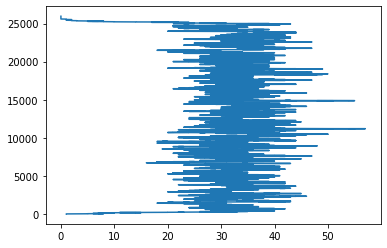

In [63]:
def pl1(q,w):
    plt.plot(df["0.1"].to_numpy()[q:w],df["0"].to_numpy()[q:w])
    plt.show()
pl1(0,25955)


Redifining the function which now return the vehicle density and the fuel consumption at a givern cluster for a particular timestep

In [65]:
def find_density(lat,lon,radius,time):
    #dist1=[]
    #dist2=[]
    count=0
    dist=0
    fuel_consumption = 0
    df_time=df_curr.loc[df_curr['timestep_time'] == time]
    #print("found data at time: "+str(time))
    X_temp=df_time.vehicle_x.values
    Y_temp=df_time.vehicle_y.values
    fuel_temp = df_time.vehicle_fuel.values
    for i in range(0,len(X_temp)):
        dist = np.linalg.norm(np.array([lat,lon])-np.array([X_temp[i],Y_temp[i]]))
        if(dist<=radius):
            count=count+1
            fuel_consumption = fuel_consumption + fuel_temp[i]
    #print(fuel_consumption)
    return count, fuel_consumption#,len(dist2)
            
find_density(8231.774687251,6197.4023123572, 1500, 2000)

found data at time: 2000
74.04999999999998


(30, 74.04999999999998)

Finding the density and the fuel consumption at every timestep for a particular cluster with X co-ordinate is 8231.77 and Y co-ordinate is 6197.40 and saving it to a file.

In [ ]:
with open('density_8231.774687251_6197.4023123572_fuel.csv','w',newline='') as csvFile:
    writer = csv.writer(csvFile)
    for i in range(25955):
        count,fuel = find_density(8231.774687251,6197.4023123572, 1500, i)
        writer.writerow([str(i), count, fuel])

Combining the all previous implementation and generating the final dataset for sequential prediction analysis. The data contains the X,Y co-ordinates of the centroids, Timestep, vehicle density, fuel consumption by vehicles in vehicle density.

In [ ]:
fuel_centroid = pd.read_csv("location_25.csv")
fuel_centroid.drop("Unnamed: 0",axis=1,inplace=True)
fuel_centroid

centroid_fuel_data = []


with open('fuel_at_centroid_with_density.csv','w',newline='') as csvFile:
    writer = csv.writer(csvFile)
    for i in range(len(fuel_centroid['x-axis'])):
        for j in range(25955):
#            centroid_fuel_data.append(find_density(fuel_centroid['x-axis'][i], fuel_centroid['y-axis'][i], 100, j))
            count, fuel = find_density(fuel_centroid['x-axis'][i], fuel_centroid['y-axis'][i], 1500, j)
            writer.writerow([fuel_centroid['x-axis'][i], fuel_centroid['y-axis'][i], j, count, fuel])
        

    
    


Saving the data to the file fuel_at_centroid_with_density.csv which will be used to model our LSTM model for sequential analysis